## Постановка задачи

В данной лабораторной работе рассматривается набор данных, содержащий информацию об оттоке клиентов операторов связи.

**Описание признаков:**

State	Буквенный код штата	категориальный

Account length	Как долго клиент обслуживается компанией - количественный

Area code	Префикс номера телефона	- количественный

International plan	Международный роуминг (подключен/не подключен) - бинарный

Voice mail plan	Голосовая почта (подключена/не подключена) - бинарный

Number vmail messages	Количество голосовых сообщений - количественный

Total day minutes	Общая длительность разговоров днем - количественный

Total day calls	Общее количество звонков днем - количественный

Total eve minutes	Общая длительность разговоров вечером - количественный

Total eve calls	Общее количество звонков вечером - количественный

Total night minutes	Общая длительность разговоров ночью	- количественный

Total night calls	Общее количество звонков ночью - количественный

Total intl minutes	Общая длительность международных разговоров - количественный

Total intl calls	Общее количество международных разговоров - количественный

Total charge	Общая сумма оплаты услуг - количественный

Customer service calls	Число обращений в сервисный центр - количественный


**При решении задачи классификации, целевой переменной является Churn – Признак оттока, бинарный (1 – потеря клиента, то есть отток).**

**При решении задачи регресии, целевой переменной является Total charge - общая оплата за услуги**

In [ ]:
!wget  -O 'telecom_churn.csv' -q 'https://www.dropbox.com/scl/fi/4j5pyw0zqrkbpbxea7838/telecom_churn.csv?rlkey=nlq0vlxavanf0bulog06q2yib&dl=0'

### Загрузка и рассмотрение данных

In [ ]:
import numpy as np # библиотека для работы с массивами, математическими операциями
import pandas as pd # библиотека для обработки и анализа данных

# библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# импорт функций библиотеки sklearn для разделения выборки и для перекрестной оценки моделей
from sklearn.model_selection import train_test_split, cross_val_score

# импорт класса библиотеки sklearn для кодирования признаков лейблами
from sklearn.preprocessing import LabelEncoder

# импорт набора функций для оценки моделей
from sklearn import metrics

np.random.seed(17) # устанавливаем значение для воспроизводимости результата

Чтение данных

In [ ]:
data = pd.read_csv("telecom_churn.csv")

In [ ]:
data.head()

Account length  Area code  International plan  Number vmail messages  \
0             128        415                   0                     25   
1             107        415                   0                     26   
2             137        415                   0                      0   
3              84        408                   1                      0   
4              75        415                   1                      0   

   Total day calls  Total eve minutes  Total eve calls  Total night minutes  \
0              110              197.4               99                244.7   
1              123              195.5              103                254.4   
2              114              121.2              110                162.6   
3               71               61.9               88                196.9   
4              113              148.3              122                186.9   

   Total night calls  Total intl minutes  Total intl calls  \
0                 91                10.0                 3   
1                103                13.7                 3   
2                104                12.2                 5   
3                 89                 6.6                 7   
4                121                10.1                 3   

   Customer service calls  Churn  Total charge State Voice mail plan  
0                       1      0         64.55    KS             Yes  
1                       1      0         47.79    OH             Yes  
2                       0      0         54.97    NJ              No  
3                       2      0         57.94    OH              No  
4                       3      0         43.68    OK              No

Вывод данных для ознакомления

Посмотрим на тип данных и количество пропусков

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day calls         3333 non-null   int64  
 5   Total eve minutes       3333 non-null   float64
 6   Total eve calls         3333 non-null   int64  
 7   Total night minutes     3333 non-null   float64
 8   Total night calls       3333 non-null   int64  
 9   Total intl minutes      3333 non-null   float64
 10  Total intl calls        3333 non-null   int64  
 11  Customer service calls  3333 non-null   int64  
 12  Churn                   3333 non-null   int64  
 13  Total charge            3333 non-null   float64
 14  State                   3333 non-null   

Можно обратить внимание на то, что все параметры представлены числовыми данными

Воспользуемся функцией describe для получения описательной статистики набора данных.

Функция возвращает информацию о количестве данных, их среднем, минимальном, максимальном значениях и перцентили 0.25, 0.5 (медианное значение), 0.75

In [ ]:
data.describe()

Account length    Area code  International plan  Number vmail messages  \
count     3333.000000  3333.000000         3333.000000            3333.000000   
mean       101.064806   437.182418            0.096910               8.099010   
std         39.822106    42.371290            0.295879              13.688365   
min          1.000000   408.000000            0.000000               0.000000   
25%         74.000000   408.000000            0.000000               0.000000   
50%        101.000000   415.000000            0.000000               0.000000   
75%        127.000000   510.000000            0.000000              20.000000   
max        243.000000   510.000000            1.000000              51.000000   

       Total day calls  Total eve minutes  Total eve calls  \
count      3333.000000        3333.000000      3333.000000   
mean        100.435644         200.980348       100.114311   
std          20.069084          50.713844        19.922625   
min           0.000000           0.000000         0.000000   
25%          87.000000         166.600000        87.000000   
50%         101.000000         201.400000       100.000000   
75%         114.000000         235.300000       114.000000   
max         165.000000         363.700000       170.000000   

       Total night minutes  Total night calls  Total intl minutes  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711           10.237294   
std              50.573847          19.568609            2.791840   
min              23.200000          33.000000            0.000000   
25%             167.000000          87.000000            8.500000   
50%             201.200000         100.000000           10.300000   
75%             235.300000         113.000000           12.100000   
max             395.000000         175.000000           20.000000   

       Total intl calls  Customer service calls        Churn  Total charge  
count       3333.000000             3333.000000  3333.000000   3333.000000  
mean           4.479448                1.562856     0.144914     50.410429  
std            2.461214                1.315491     0.352067     10.258458  
min            0.000000                0.000000     0.000000     15.410000  
25%            3.000000                1.000000     0.000000     43.560000  
50%            4.000000                1.000000     0.000000     50.480000  
75%            6.000000                2.000000     0.000000     57.140000  
max           20.000000                9.000000     1.000000     85.060000

Проведём визуализацию данных для ознакомления с попарным распределением признаков.

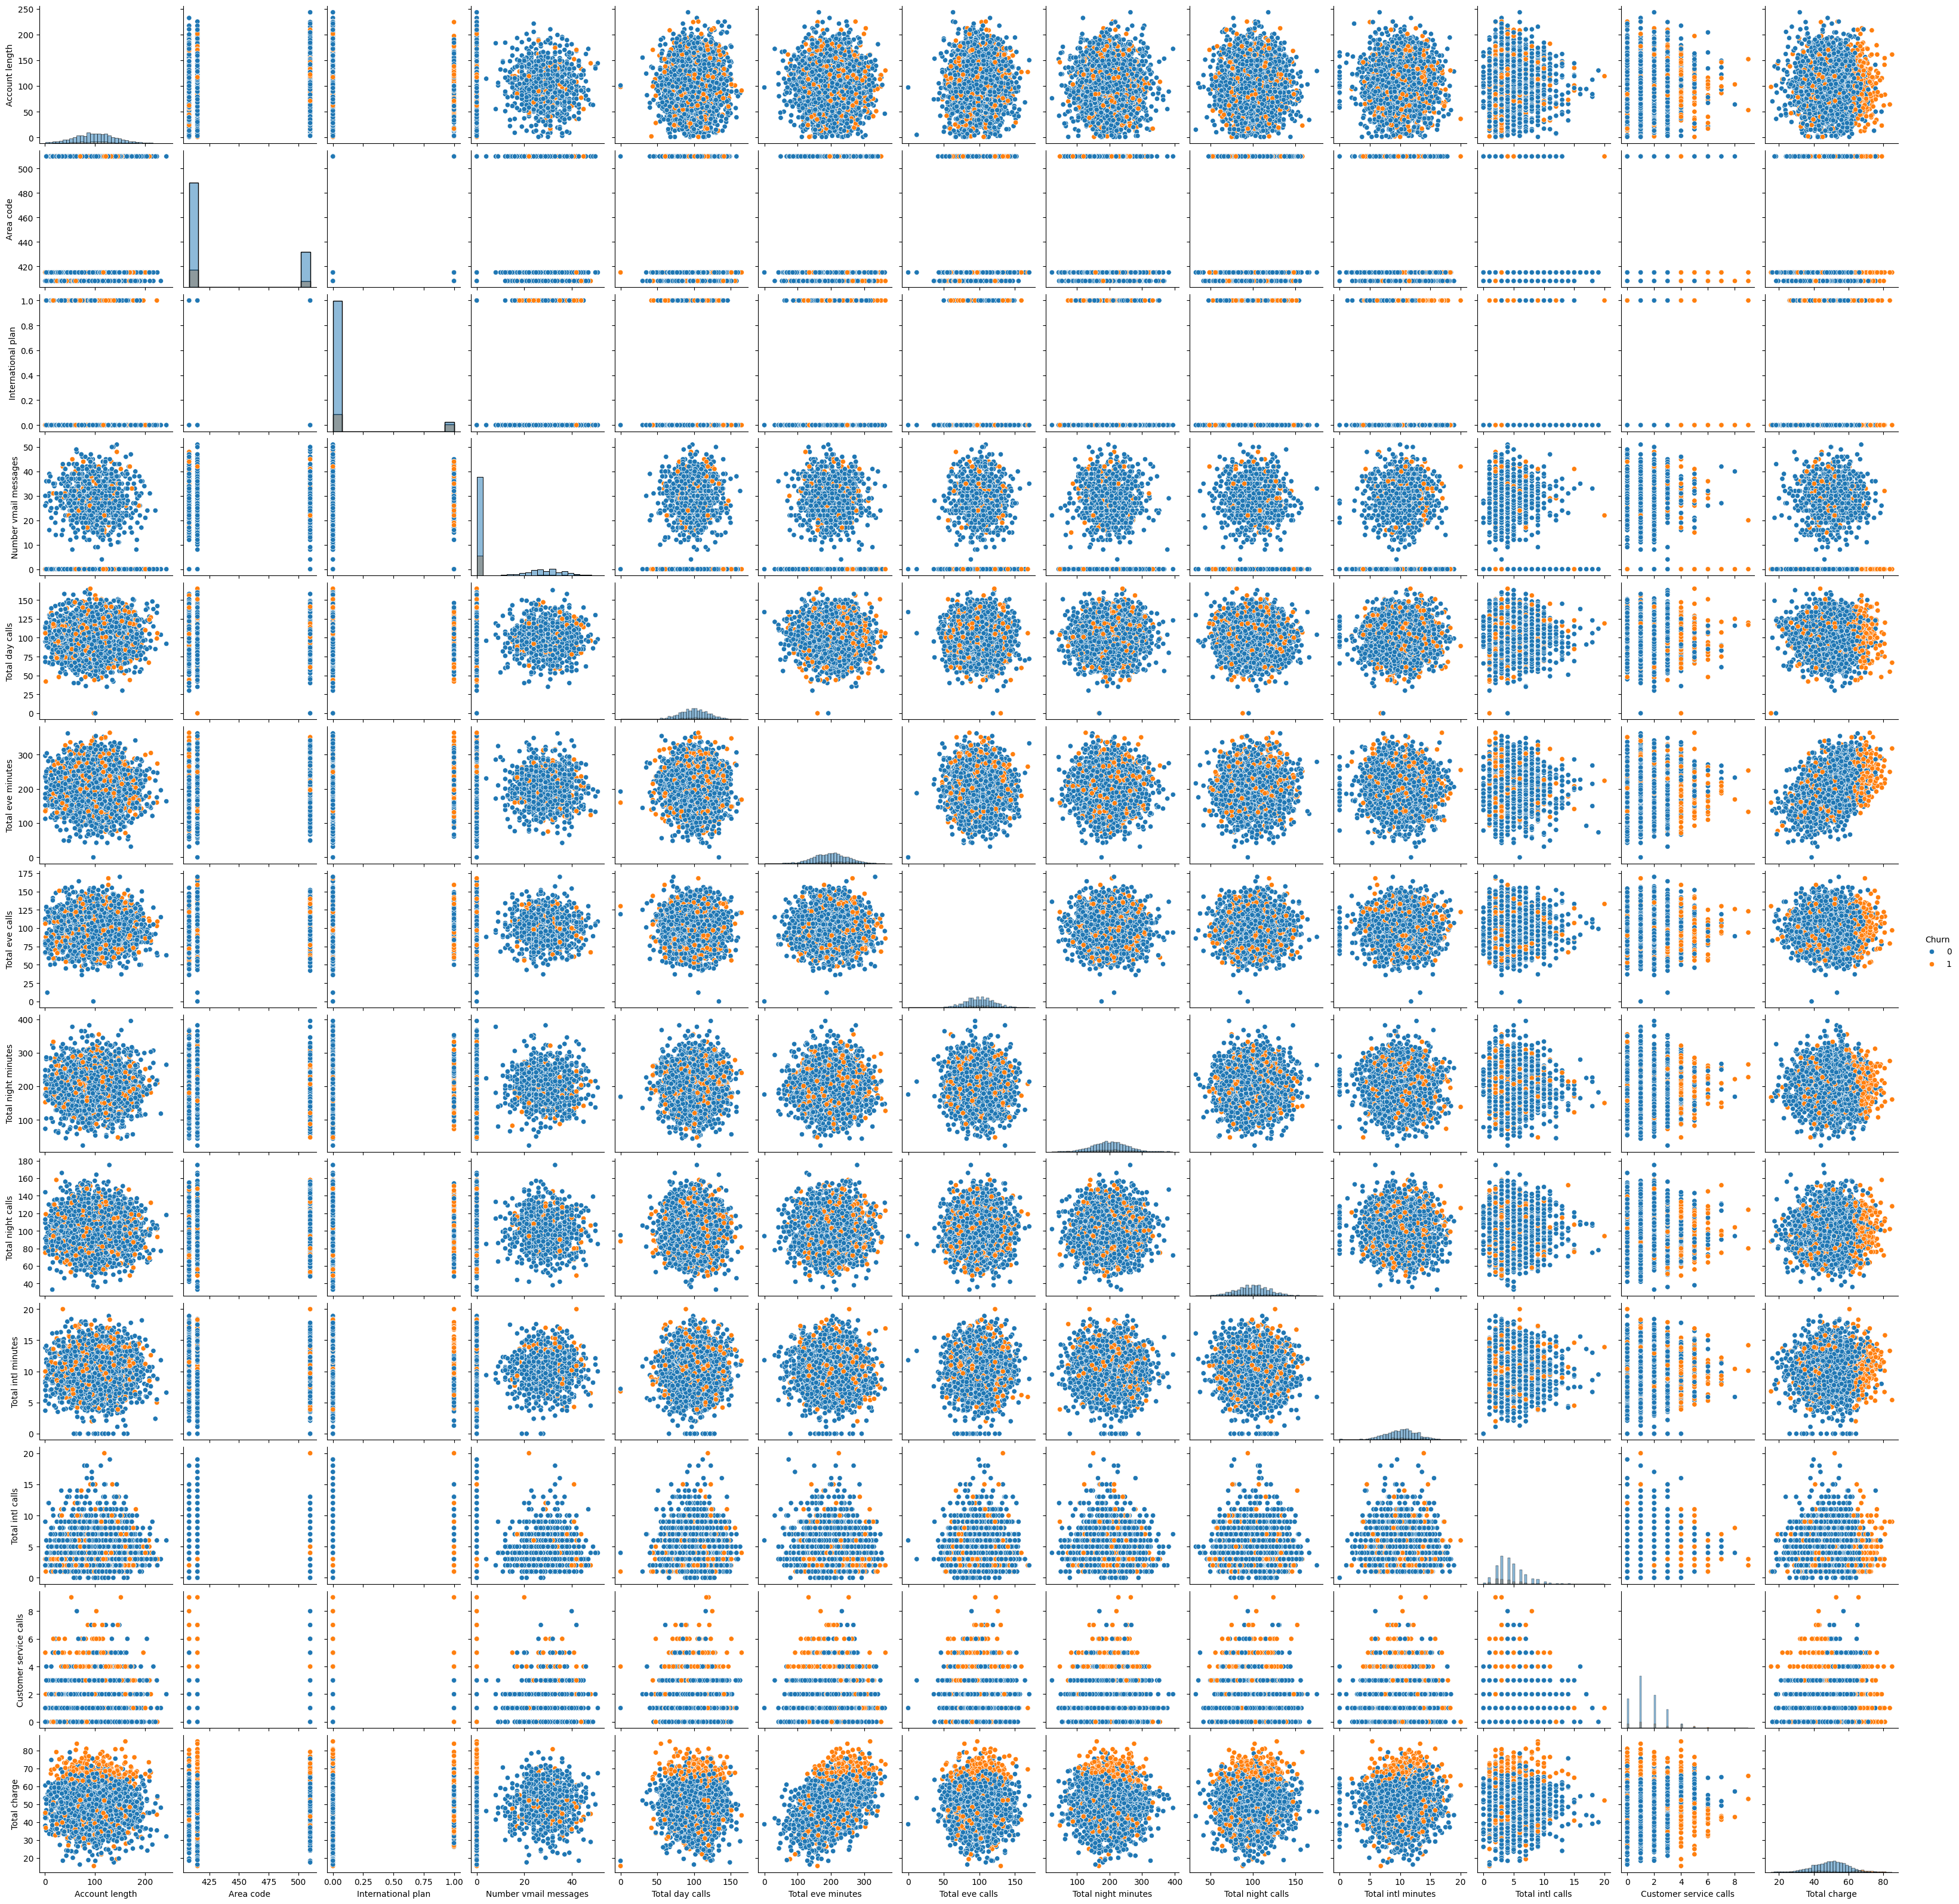

In [ ]:
sns.pairplot(data, hue='Churn', vars=(data.drop("Churn", axis=1).loc[:,:'Total charge'].columns), diag_kind="hist", palette="tab10");

Можно заметить, что количество звонков и их продолжительность в разное время суток, никак не связаны между собой

## Решение задачи регрессии

<font color='green'>**Задание 1**</font>

Визуализируйте распределение значений целевого признака - общее пополнение счета Total charge

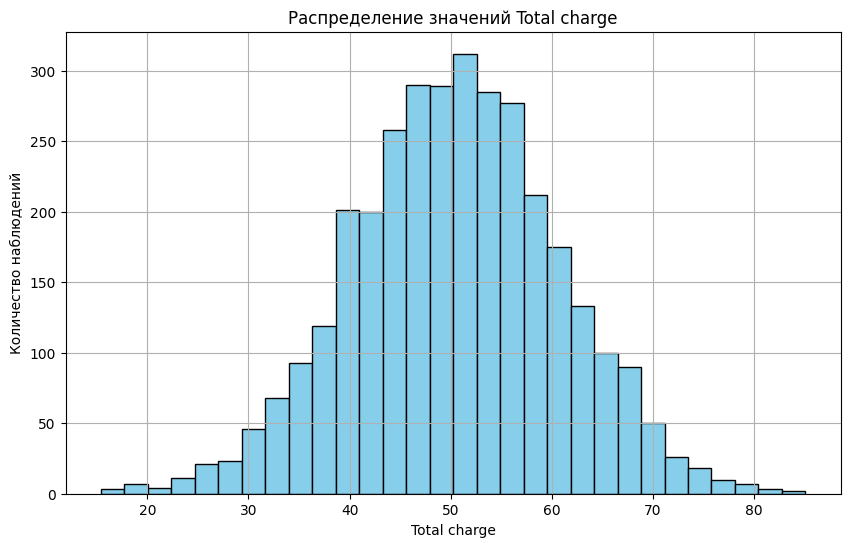

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Total charge'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение значений Total charge')
plt.xlabel('Total charge')
plt.ylabel('Количество наблюдений')
plt.grid(True)
plt.show()

<font color='green'>**Задание 2**</font>

Предобработайте данные: Отбросьте колонки (при помощи метода drop), представленные не в численном виде, или примените кодирование.

При помощи LabelEncoder

<font color='#87CEEB'><i> Пример использования label кодирования доступен по [ссылке](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) </i></font>

Пример:

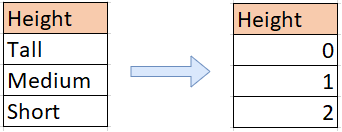

In [ ]:
label_encoder = LabelEncoder()
data = data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day calls         3333 non-null   int64  
 5   Total eve minutes       3333 non-null   float64
 6   Total eve calls         3333 non-null   int64  
 7   Total night minutes     3333 non-null   float64
 8   Total night calls       3333 non-null   int64  
 9   Total intl minutes      3333 non-null   float64
 10  Total intl calls        3333 non-null   int64  
 11  Customer service calls  3333 non-null   int64  
 12  Churn                   3333 non-null   int64  
 13  Total charge            3333 non-null   float64
 14  State                   3333 non-null   

Разделение данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Total charge"], axis=1), data["Total charge"], test_size=0.25, random_state=17)

R2 score - коэффициент детерминации заключается в измерении количества отклонений в прогнозах, объясненных набором данных и выражает разницу между выборками в наборе данных и прогнозами, сделанными моделью.

В данном случае пометка ^ указывает на то, что результат предсказан

Пример:

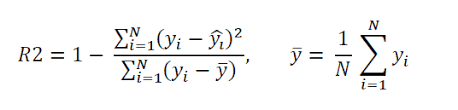

<font color='#87CEEB'><i> Ознакомиться с описанием метрик можно в таблице, доступной по [ссылке](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/) разделе "Регрессия" </i></font>

<font color='green'>**Задание 3**</font>

Заполните пропуски в функции для оценки метрик для множества подвыборок

Функция получает на вход список со списками истинных значений целевого признака подвыборок и список со списками предсказаний и возвращает список со словарями выбранных метрик

In [ ]:
def regression_quality_estimation(real_values, predictions):
    # Функция возвращает значения метрик для каждой подвыборки
    metrics_scores = []
    for num in range(len(predictions)):
        current_scores = {}
        # Средняя квадратичная ошибка
        current_scores["mse"] = metrics.mean_squared_error(real_values[num], predictions[num])
        # Средняя абсолютная ошибка
        current_scores["mae"] = metrics.mean_absolute_error(real_values[num], predictions[num])
        # Коэффициент детерминации - R^2 score
        current_scores["r2_score"] =  metrics.r2_score(real_values[num], predictions[num])
        # Максимальное отклонение
        current_scores["max_error"] =  metrics.max_error(real_values[num], predictions[num])

        metrics_scores.append(current_scores)

    return metrics_scores

Рассмотрим модель линейной регрессии для решения задачи.

<i> Для данной модели требуется предварительная стандартизация признаков </i>

In [ ]:
from sklearn.preprocessing import StandardScaler # импортирование стандартизатора
from sklearn.linear_model import LinearRegression # импортирование модели линейной регресии

In [ ]:
# нормализация данных
scaler = StandardScaler() # инициализация стандартизатора
X_train_scaled = scaler.fit_transform(X_train) # обучение стандартизатора и последующая стандартизация обучающей выборки
X_test_scaled = scaler.transform(X_test) # ПРИМЕНИТЕ МЕТОД transform для нормализации ПРИЗНАКОВ ТЕСТОВОЙ ВЫБОРКИ

Для обучения подели требуется воспользоваться методом .fit(X_train, y_train).

Для получения предсказаний требуется применить метод .predict(X_test)

In [ ]:
model_linear = LinearRegression() # Инициализация модели

model_linear.fit(X_train_scaled, y_train)# ВАШ КОД ДЛЯ ОБУЧЕНИЯ МОДЕЛИ. Воспользуйтесь данными X_train_scaled и y_train

LinearRegression()

Фунция для получения семплов. Используется для получения интервальных оценок метрик на тестовых данных

In [ ]:
def bootstrap(data, number_of_samples=50):
    samples = []
    for i in range(number_of_samples):
        samples.append(data.sample(frac=0.5, replace=True))
    return samples

test_data = X_test
test_data["Total charge"] = y_test

samples = bootstrap(test_data, number_of_samples=50) # получение 50 подвыборок из тестового набора данных
predictions = [] # Список предсказаний для подвыборок
real_values = [] # Список истинных значений

<font color='green'>**Задание 4**</font>

Используйте модель для получения предсказаний на признаках полученных семплов

In [ ]:
predictions_linear = [] # список предсказанных значений
real_values_reg = [] # список истинных значений

for sample in samples:
    prediction = model_linear.predict(scaler.transform(sample.drop("Total charge", axis=1)))
    predictions_linear.append(prediction)
    real_values_reg.append(sample["Total charge"]) # Добавление истинных значений в список

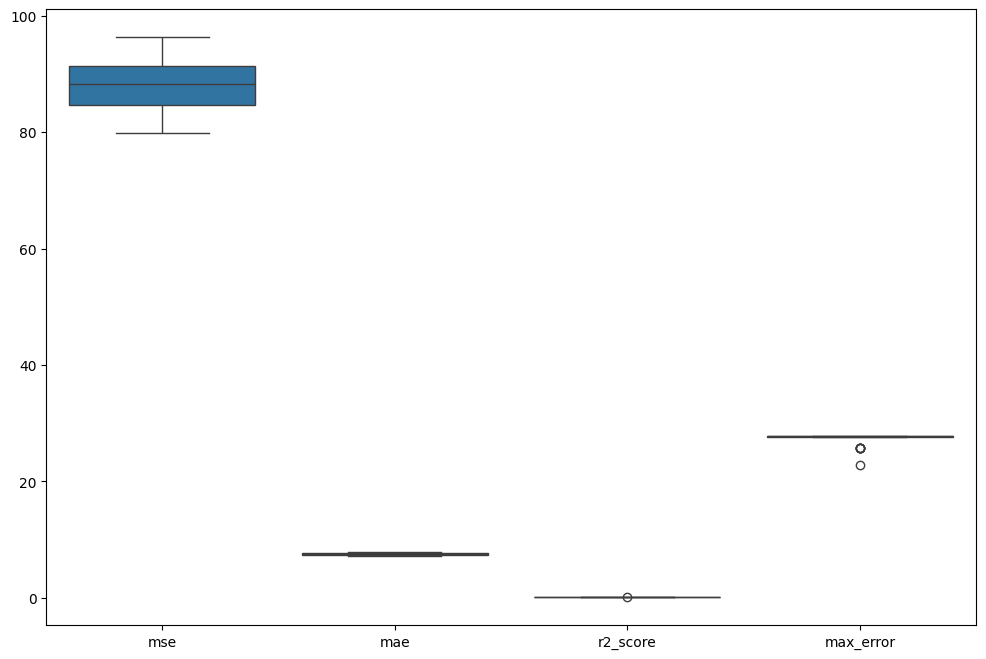

In [ ]:
plt.figure(figsize=(12, 8))
sample_metrics_linear = regression_quality_estimation(real_values_reg, predictions_linear)
sns.boxplot(pd.DataFrame(sample_metrics_linear));

Можно видеть, что метрики имеют разную чувствительность к отклонениям. Так наибольшее значение принимает метрика, учитывающая квадрат ошибок. А наименьшее R2, так как наибольшее значение ограничено единицей.

При этом разница в масштабах не позволяет корректно отобразить распределения на одном графике

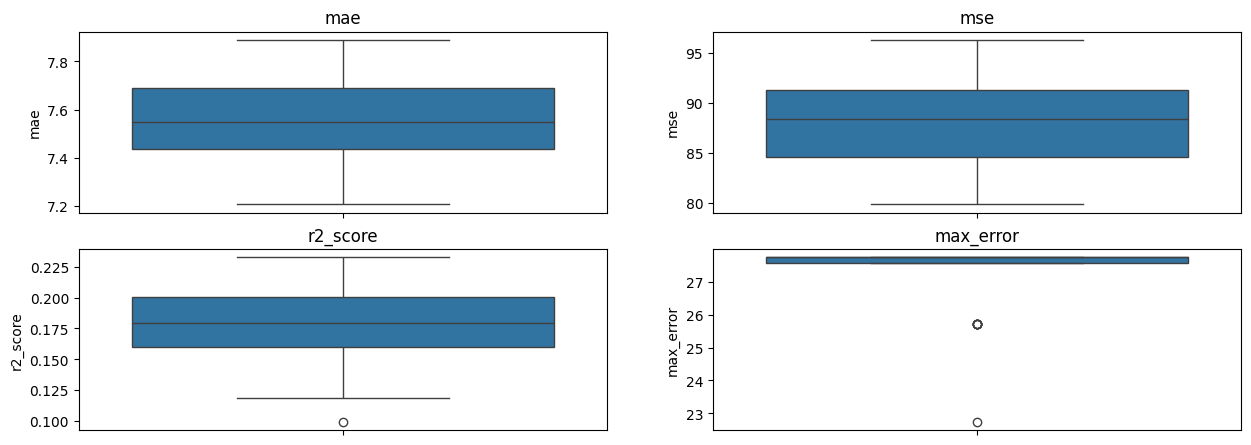

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(["mae", "mse", "r2_score", "max_error"]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(pd.DataFrame(sample_metrics_linear)[col])
    plt.title(col);

In [ ]:
pd.DataFrame(sample_metrics_linear).describe()

mse        mae   r2_score  max_error
count  50.000000  50.000000  50.000000  50.000000
mean   88.118476   7.561278   0.178739  27.366204
std     4.106263   0.183084   0.028465   0.932665
min    79.827863   7.206125   0.099219  22.739703
25%    84.587301   7.436950   0.160211  27.567627
50%    88.325184   7.547630   0.179502  27.749071
75%    91.312023   7.688475   0.200615  27.749071
max    96.278164   7.889953   0.232725  27.749071

Можем обратить внимание, что больше выбросов встерчается в метрике, отражающей максимальную ошибку

Отобразим полученную функцию линейной регресии. Для удобства отображения, понизим размерность пространства признаков при помощи метода главных компонент.

<i> Приведенный код далее нужен только для ознакомления с результатом</i>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
features = pca.fit_transform(scaler.transform(test_data.drop("Total charge", axis=1)))

In [ ]:
# Функция для построения линейной регресии
def LinearCoeffs(x, coeffs, bias):
    y = bias
    for i in range(len(coeffs)):
        y += coeffs[i]*x
    return y

In [ ]:
# Функция для более красивого отборажения коэффициентов модели
def beatiful_coef(coefs, feature_names=data.columns):
    return pd.DataFrame(coefs, index=feature_names, columns=["coef"]).sort_values(
        "coef", ascending=False
    )

In [ ]:
beatiful_coef(model_linear.coef_, feature_names=X_train.columns)  # Коэффициенты модели

coef
Total eve minutes       4.318208
Churn                   2.109375
Total intl minutes      0.579462
Voice mail plan         0.271133
Total intl calls        0.266065
Total night calls       0.153511
Total eve calls         0.134566
Total night minutes     0.015093
Total day calls        -0.008009
Account length         -0.008453
Area code              -0.049499
State                  -0.072915
International plan     -0.160785
Number vmail messages  -0.246719
Customer service calls -0.556502

In [ ]:
model_linear.intercept_ # Значение отступа

50.36900760304121

Визуализация линейной регрессии поверх истинных значений

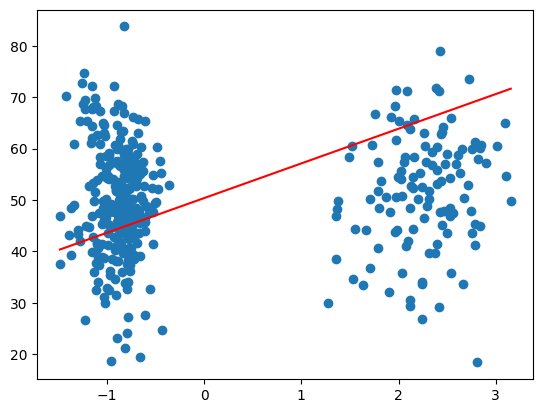

In [ ]:
features = pca.fit_transform(scaler.transform(sample.drop("Total charge", axis=1)))
plt.scatter(features, sample["Total charge"])
plt.plot(np.linspace(features.min(), features.max(), 100), LinearCoeffs(np.linspace(features.min(), features.max(), 100), model_linear.coef_, model_linear.intercept_), color="r");

### Применим регуляризацию

При использовании моделей с CV, можно передавать в качестве аргумента cv - количество разбиений при кросс-валидации
Например

```
cv=5
```

In [ ]:
# импорт моделей регрессии с l1 и l2 регуляризацией. Приписка CV указывает на cross валидацию при обучении модели
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
predictions_lasso_model = []

real_values_lasso = []
for sample in samples:
    prediction = lasso_model.predict(scaler.transform(sample.drop("Total charge", axis=1)))
    predictions_lasso_model.append(prediction)
    real_values_lasso.append(sample["Total charge"])

<font color='green'>**Задание 5**</font>

Получите метрики и отобразите их значения по аналогии с тем, как это было сделано для линейной регрессии без регуляризации, сравните результаты

In [ ]:
sample_metrics_lasso= regression_quality_estimation(real_values_lasso, predictions_lasso_model)
pd.DataFrame(sample_metrics_lasso).describe()

mse        mae   r2_score  max_error
count  50.000000  50.000000  50.000000  50.000000
mean   89.324224   7.600788   0.167918  27.949526
std     4.537997   0.194497   0.020094   1.025567
min    80.731002   7.170793   0.110329  23.466039
25%    85.578805   7.461598   0.154280  27.644135
50%    89.327856   7.598200   0.168634  28.589493
75%    92.545432   7.733801   0.183570  28.589493
max    97.798379   7.998361   0.206195  28.589493

<font color='green'>**Задание 6**</font>

Сделайте выводы по получившимся графикам

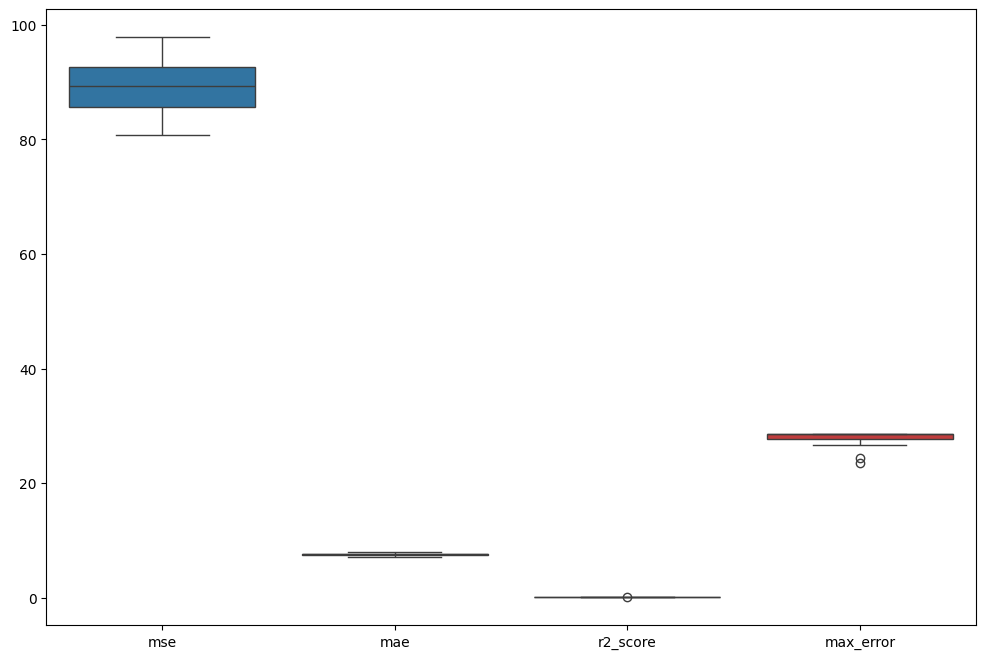

In [ ]:
plt.figure(figsize=(12, 8))
sample_metrics_lasso_model = regression_quality_estimation(real_values_lasso, predictions_lasso_model)
sns.boxplot(pd.DataFrame(sample_metrics_lasso_model));

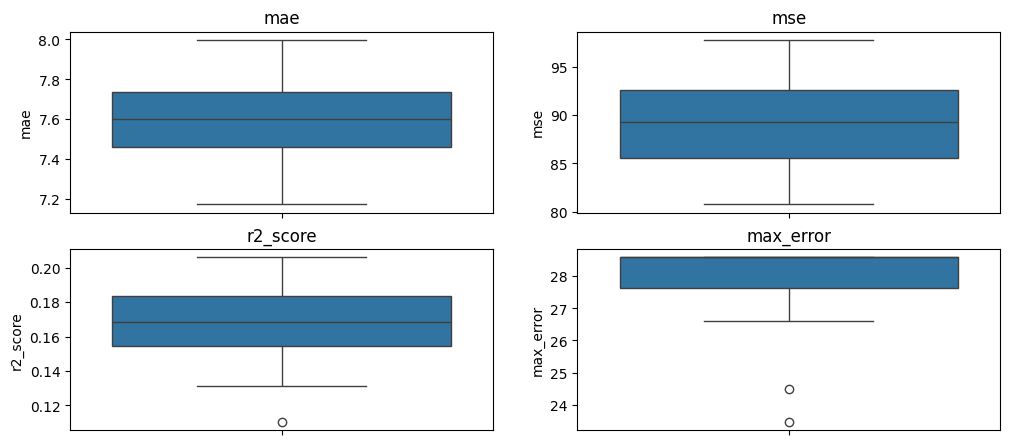

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(["mae", "mse", "r2_score", "max_error"]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(pd.DataFrame(sample_metrics_lasso_model)[col])
    plt.title(col);

Статистика по полученным предсказаниям

In [ ]:
pd.DataFrame(sample_metrics_lasso_model).describe()

mse        mae   r2_score  max_error
count  50.000000  50.000000  50.000000  50.000000
mean   89.324224   7.600788   0.167918  27.949526
std     4.537997   0.194497   0.020094   1.025567
min    80.731002   7.170793   0.110329  23.466039
25%    85.578805   7.461598   0.154280  27.644135
50%    89.327856   7.598200   0.168634  28.589493
75%    92.545432   7.733801   0.183570  28.589493
max    97.798379   7.998361   0.206195  28.589493

Lasso-модель проявляет более высокую точность, потому что MSE и MAE ниже. Но r2_score выше. Но с другой стороны максимальное отклонение выше.

<font color='green'>**Задание 7**</font>

Повторите действия для линейной модели с l2 регуляризацией и сравните результаты

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

predictions_ridge_model = []
real_values_ridge = []

for sample in samples:
    prediction = ridge_model.predict(scaler.transform(sample.drop("Total charge", axis=1)))
    predictions_ridge_model.append(prediction)
    real_values_ridge.append(sample["Total charge"])

sample_metrics_ridge = regression_quality_estimation(real_values_ridge, predictions_ridge_model)
pd.DataFrame(sample_metrics_ridge).describe()

mse        mae   r2_score  max_error
count  50.000000  50.000000  50.000000  50.000000
mean   88.116229   7.561213   0.178760  27.365563
std     4.106414   0.183083   0.028453   0.932267
min    79.825545   7.206057   0.099264  22.741423
25%    84.584002   7.436863   0.160230  27.569031
50%    88.321084   7.547589   0.179519  27.747718
75%    91.309593   7.688355   0.200636  27.747718
max    96.276429   7.889931   0.232719  27.747718

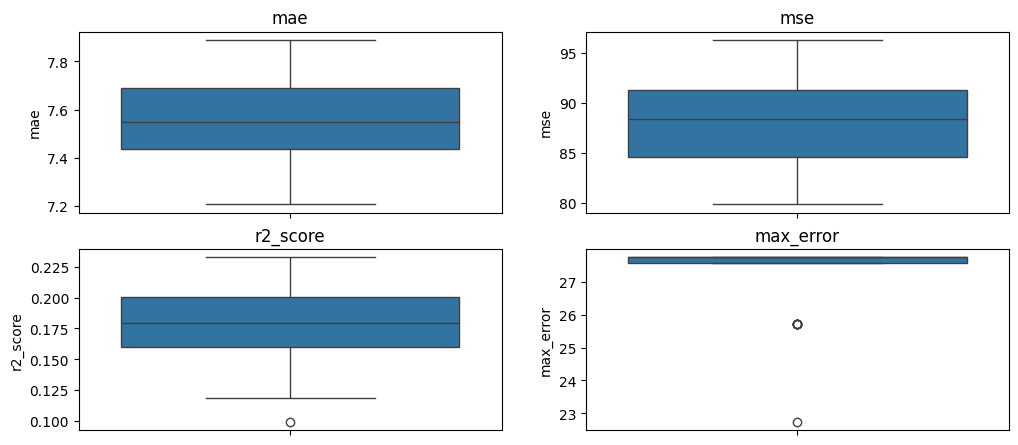

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(["mae", "mse", "r2_score", "max_error"]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(pd.DataFrame(sample_metrics_ridge)[col])
    plt.title(col);

### Выводы

У Lasso MSE и MAE ниже чем у других моделей. Но коэффициент детерминации у Lasso выше. Еще максимальная ошибка у Lasso больше, чем у других моделей